In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/PetImages'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

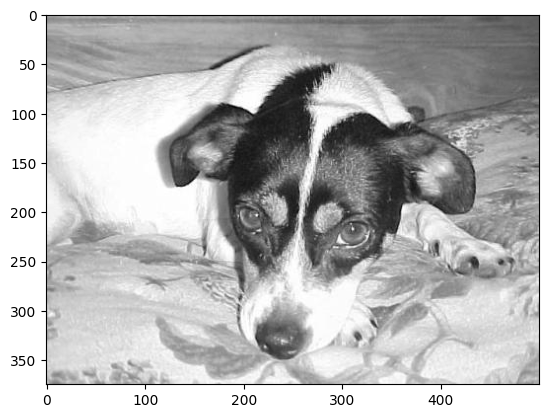

In [2]:
Categories = ["Dog","Cat"]
DataDir = "/kaggle/input/cat-and-dog/PetImages"


for category in Categories:
    path = os.path.join(DataDir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break
#Shows what a image will look like

In [3]:
print(img_array) 
#data looks like 2d array of numbers due to grayscale

[[156 160 165 ...  92  92  92]
 [159 163 167 ...  94  94  94]
 [156 159 162 ...  96  96  96]
 ...
 [185 194 183 ... 171 172 174]
 [172 190 184 ... 170 171 173]
 [155 183 185 ... 169 167 166]]


(375, 500)


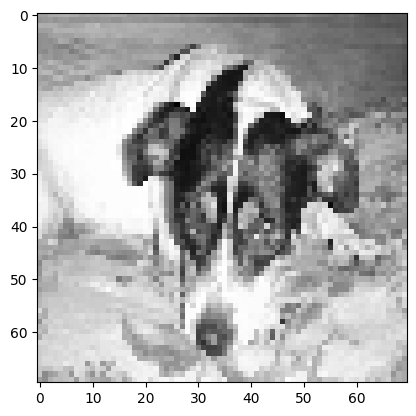

In [4]:
print(img_array.shape)
#images are of different sizes

IMG_SIZE = 70 #rescale images to size 50x50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()


In [5]:
#create training data
training_data = []

#
def create_training_data():
    for category in Categories:
        path = os.path.join(DataDir,category)
        class_num = Categories.index(category) #cl
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


In [6]:
print(len(training_data))

24946


In [7]:
import random

random.shuffle(training_data)
#shuffle training data

In [8]:
for sample in training_data[:10]:
    print(sample[1])
#check that data have been shuffled

0
0
0
1
0
1
1
0
1
1


In [9]:
#Create and setup features and labels
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)
y = np.array(y)

In [10]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Added BatchNormalization and dropouts to reduce model overfitting.

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

#normalize the values
X = X/255.0

model = Sequential([
    Conv2D(64, (3,3),activation="relu",input_shape = X.shape[1:]),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, (3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, (3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(64,activation="relu"),
    Dropout(0.1),
    Dense(64,activation="relu"),
    Dropout(0.1),
    Dense(1,activation="sigmoid"),
])

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

hist = model.fit(X,y,epochs = 10, batch_size=32, validation_split = 0.3)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/10
546/546 [==============================] - 108s 195ms/step - loss: 0.6095 - accuracy: 0.6708 - val_loss: 0.6780 - val_accuracy: 0.5866
Epoch 2/10
546/546 [==============================] - 107s 195ms/step - loss: 0.4727 - accuracy: 0.7769 - val_loss: 0.7059 - val_accuracy: 0.6483
Epoch 3/10
546/546 [==============================] - 113s 206ms/step - loss: 0.4088 - accuracy: 0.8150 - val_loss: 0.4746 - val_accuracy: 0.7920
Epoch 4/10
546/546 [==============================] - 128s 234ms/step - loss: 0.3425 - accuracy: 0.8462 - val_loss: 0.7405 - val_accuracy: 0.6625
Epoch 5/10
546/546 [==============================] - 110s 202ms/step - loss: 0.2941 - accuracy: 0.8732 - val_loss: 0.4170 - val_accuracy: 0.8196
Epoch 6/10
546/546 [==============================] - 113s 207ms/step - loss: 0.2445 - accuracy: 0.8986 - val_loss: 0.5408 - val_accuracy: 0.7842
Epoch 7/10
546/546 [==============================] - 110s 201ms/step - loss: 0.1898 - accuracy: 0.9206 - val_loss: 0.4955 -

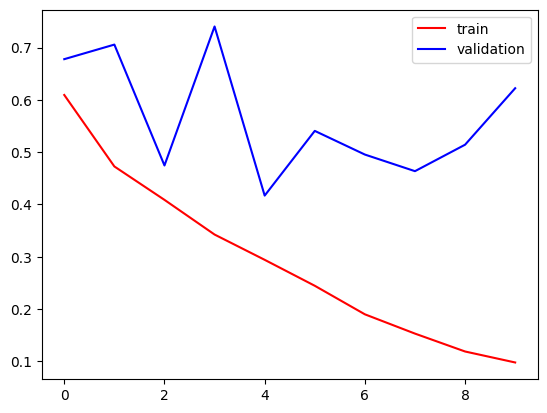

In [12]:
plt.plot(hist.history['loss'],color='red',label = 'train')
plt.plot(hist.history['val_loss'],color='blue',label = 'validation')
plt.legend()
plt.show()

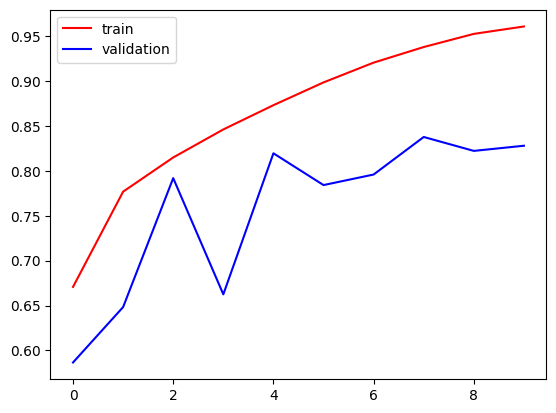

In [13]:
plt.plot(hist.history['accuracy'],color='red',label = 'train')
plt.plot(hist.history['val_accuracy'],color='blue',label = 'validation')
plt.legend()
plt.show()

## Test predictions using pictures of the animals

Define a function prep that prepares a picture to be predicted by the model.

In [14]:
def prep(filepath):
    IMG_SIZE = 70 #rescale images to size 50x50
    test_img = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_img = cv2.resize(test_img, (IMG_SIZE, IMG_SIZE))
    return new_img.reshape((-1,IMG_SIZE,IMG_SIZE,1))

In [15]:
test_img = prep('../input/cat-and-dog/PetImages/Dog/10008.jpg')
pred = model.predict(test_img)
pred[0][0]
#0 = dog, 1 = cat

1/1 [==============================] - 0s 134ms/step


0.0